<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT 3850 </h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Inteligencia Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>




<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->



<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Optimizacion para IA - clase 3</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

## Tabla de contenidos:
1. [Ejemplo: minimos](#Ejemplo:-minimos")
2. [Ejemplo: funciones convexas](#Ejemplo:-funciones-convexas")
3. [Ejemplo: Metodo de Newton](#Ejemplo:-Metodo-de-Newton")
4. [Ejemplo: funciones cuadratica](#Ejemplo:-funcion-cuadratica")
5. [Ejemplo: descenso del gradiente](#Ejemplo:-descenso-del-gradiente)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))
from matplotlib import cm
from matplotlib.ticker import LinearLocator

## Ejemplo: minimos
\begin{equation}
f(x) = x^4 + 7x^3 + 5 x^{2} -12 x+3
\end{equation}

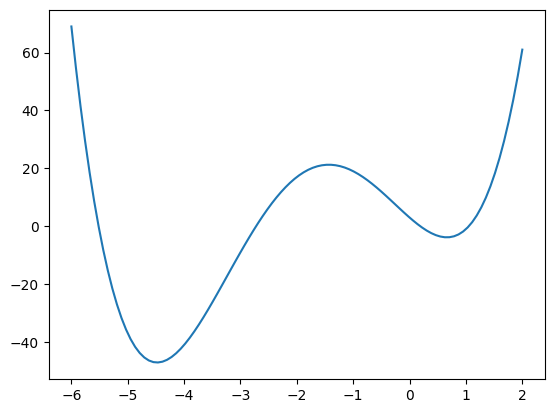

In [2]:
f = lambda x: x**4 + 7*x**3 + 5*x**2 - 17*x + 3
x = np.linspace(-6,2,100)
plt.plot(x, f(x))
plt.show()

## Ejemplo: funciones convexas

**Ejemplo 1:** $$f(x) = 3x^{2} - 5x + 2$$

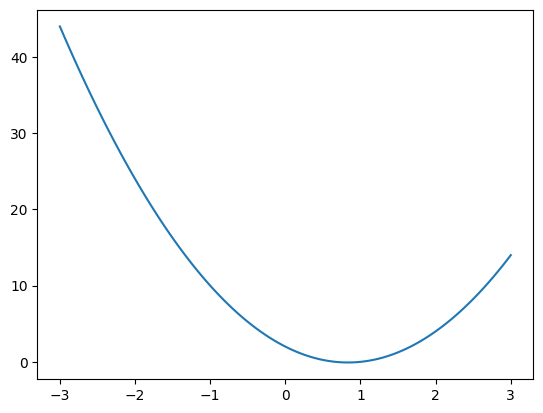

In [5]:
fcon1 = lambda x: 3*x**2-5*x+2
x = np.linspace(-3,3,100)
plt.plot(x,fcon1(x))
plt.show()

**Ejemplo 2:**
$$f(x) = x\log_2(x)$$

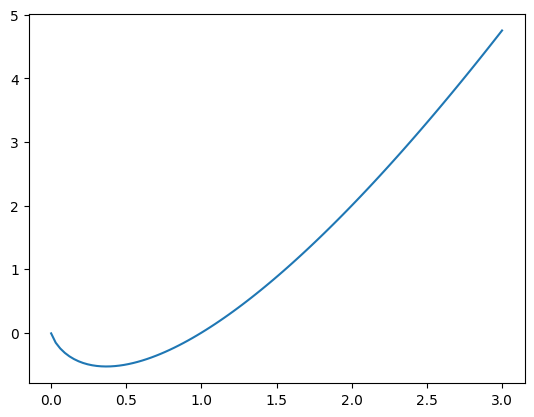

In [6]:
fcon2 = lambda x: x*np.log2(x)
x = np.linspace(0.001,3,100)
plt.plot(x,fcon2(x))
plt.show()

**Ejemplo 3:** $$f(x) = \ln(1+\exp(x))$$

## Ejemplo: Metodo de Newton


Queremos encontrar 
$$
\min_{x} f(x)
$$

Resolvemos calculando su gradiente e igualando a cero
$$ \nabla f(x) = 0$$

Resolvemos este problema no lineal usando el m\'etodo de Newton. La iteraci\'on queda
$$
x_{k+1} = x_{k}- (H(x_k))^{-1} \nabla f(x_k)
$$

**Ejemplo** Testeamos con la funcion $f(x) = \frac{1}{3} x^{3} - 4x$

x0: -4
x1: -2.5
x2: -2.05
x3: -2.000609756097561
x4: -2.0000000929222947


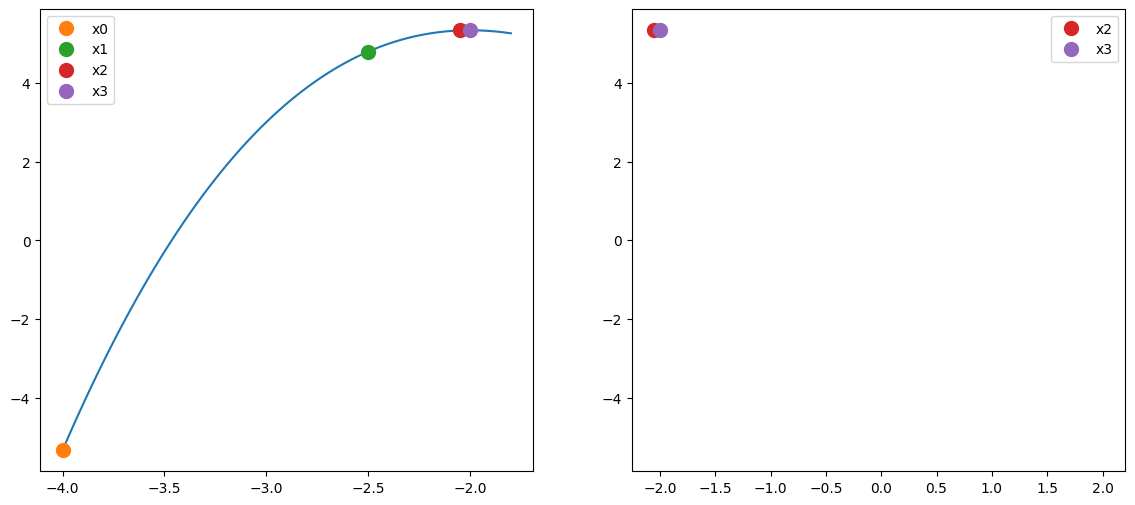

In [30]:
F = lambda x: 1/3*x**3 - 4*x
gradF = lambda x: x**2 - 4
H = lambda x: 2*x

# Newton:
def Newton_iter(x0, gradF_x0, H_x0):
    if np.isscalar(x0)==1:
        return x0 - gradF_x0/H_x0
    else:
        return x0 - np.linalg.solve(H_x0, gradF_x0)
    
x0 = -4 # lleva a un maximo local
# x0 = 2.5 # lleva a un minimo local
#  iteracion 1
x1 = Newton_iter(x0, gradF(x0), H(x0))
#  iteracion 2
x2 = Newton_iter(x1, gradF(x1), H(x1))
#  iteracion 3
x3 = Newton_iter(x2, gradF(x2), H(x2))
#  iteracion 4
x4 = Newton_iter(x3, gradF(x3), H(x3))
print("x0:",x0);print("x1:",x1);print("x2:",x2);print("x3:",x3);print("x4:",x4)

# xplot = np.linspace(1.8,2.5,100)
xplot = np.linspace(-4,-1.8,100)

fig, ax = plt.subplots(1,2 , figsize=(14,6))
ax[0].plot(xplot, F(xplot))
ax[0].plot(x0,F(x0),'.',label='x0', markersize=20)
ax[0].plot(x1,F(x1),'.',label='x1', markersize=20)
ax[0].plot(x2,F(x2),'.',label='x2', markersize=20)
ax[0].plot(x3,F(x3),'.',label='x3', markersize=20)
ax[0].legend()


xzoom = np.linspace(1.9999,2.001,100)
ax[1].plot(xzoom, F(xzoom))
ax[1].plot(x2,F(x2),'.',color='C03',label='x2', markersize=20)
ax[1].plot(x3,F(x3),'.',color='C04', label='x3', markersize=20)
ax[1].legend()
plt.show()

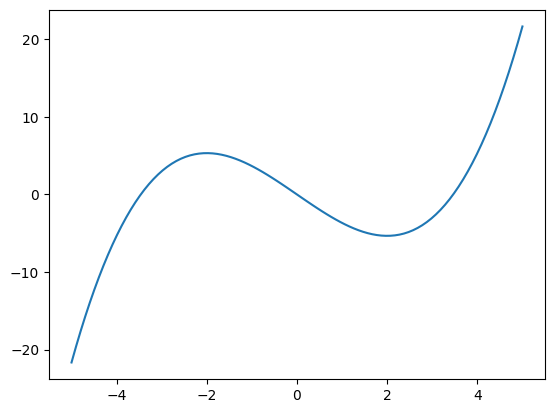

In [11]:
xplot = np.linspace(-5,5,100)
plt.plot(xplot, F(xplot))

## Ejemplo: funcion cuadratica

$$ f(x,y) = a x^{2} + b y^{2} $$

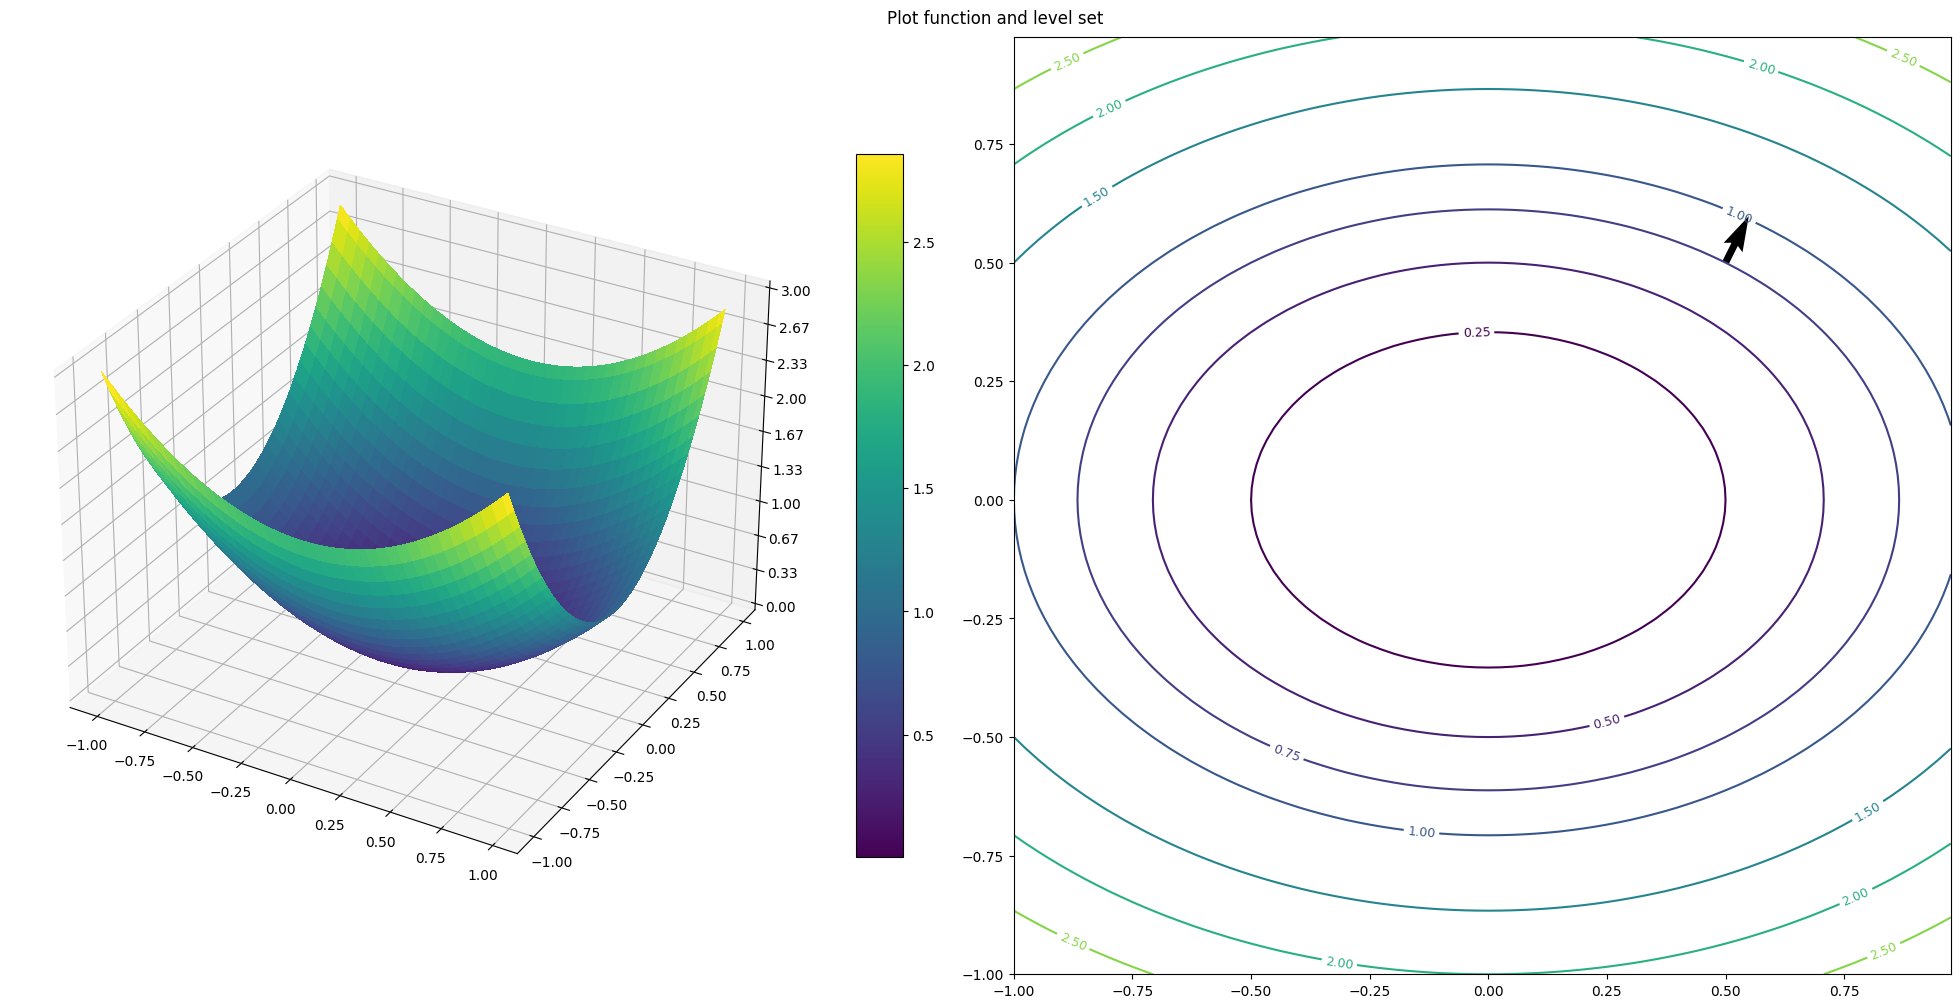

In [17]:
a=1.0; b = 2.0
f = lambda x,y: a * x**2 + b * y**2


# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=(20,10))
fig.suptitle('Plot function and level set')

# First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')


# Make data.
x = np.arange(-1, 1, 0.025)
y = np.arange(-1, 1, 0.025)
X, Y = np.meshgrid(x, y)

Z = a * X**2 + b * Y**2
# Plot the surface.

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

point = [.5,0.5]
gradatpoint = [2*a*point[0], 2*b*point[1]]
# Customize the z axis.
ax.set_zlim(0, 3)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.75, aspect=15)
plt.tight_layout()

ax = fig.add_subplot(1, 2, 2)
z = f(x,y)

CS = ax.contour(X,Y, Z, levels=[0.25,0.5,0.75,1,1.5,2,2.5,3],)#,colors=['C05', 'C04', 'C03','C02', 'C01', 'C00'])
ax.clabel(CS, fontsize=9, inline=True)
ax.quiver(point[0], point[1], gradatpoint[0],gradatpoint[1])
ax.set_aspect('equal')

plt.show()

## Ejemplo: descenso del gradiente

**Descenso Zig-Zag**
$$
f(x,y) = \frac{1}{2} (x^2 + b y^2)
$$

In [28]:
# Line search
from scipy.optimize import line_search
b=0.1
def objective_function(x):
    
    return 0.5*(x[0]**2+b*x[1]**2)

def gradient(x):
    return np.array([x[0], b*x[1]])

x = np.array([b, 1.0])  # Initial point
direction = np.array([-1.0, -1.0])  # Search direction

# Perform line search
alpha, _, _, _, _, _ = line_search(objective_function, gradient, x, direction)

print("Step size:", alpha)

print("Exact line search:", 2.0/(b+1.0))

Step size: 0.18181818181818182
Exact line search: 1.8181818181818181


0.0033132959484156077 0.0049494914784973905 0.007393684801212152 0.01104488717218112 0.016499152442394017 0.02464688204357625 0.03681818181818181 0.05500000000000001


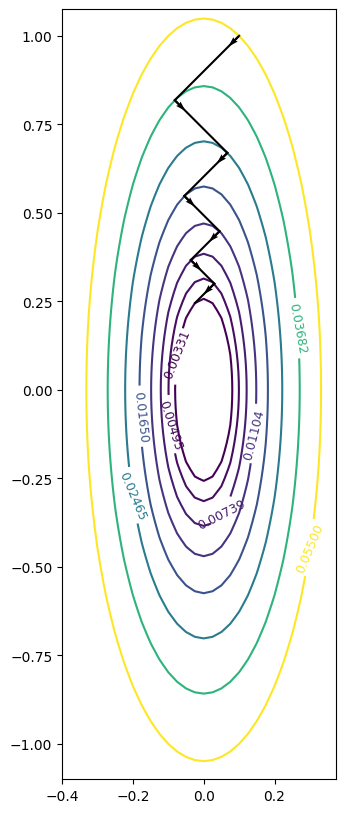

In [29]:
b = .1
f = lambda x,y: 0.5*(x**2+b*y**2)
# iteration
# starting
x0 = b; y0 = 1.0; f0 = f(x0,y0)
gamma = 2.0/(b+1.0)
xfun = lambda k: b*((b-1)/(b+1))**k
yfun = lambda k: ((1-b)/(b+1))**k

x1 = xfun(1); y1 = yfun(1); f1 = f(x1,y1)
x2 = xfun(2); y2 = yfun(2); f2 = f(x2,y2)
x3 = xfun(3); y3 = yfun(3); f3 = f(x3,y3)
x4 = xfun(4); y4 = yfun(4); f4 = f(x4,y4)
x5 = xfun(5); y5 = yfun(5); f5 = f(x5,y5)
x6 = xfun(6); y6 = yfun(6); f6 = f(x6,y6)
x7 = xfun(7); y7 = yfun(7); f7 = f(x7,y7)
print(f7,f6, f5,f4,f3,f2,f1,f0)
fig, ax = plt.subplots(1,1, figsize=(10,10))
x = np.arange(-.4, .4, 0.025)
y = np.arange(-1.1, 1.1, 0.025)
X, Y = np.meshgrid(x, y)
z = f(X,Y)

CS = ax.contour(X,Y, z, levels=[f7,f6,f5,f4,f3,f2,f1,f0])#,colors=['C05', 'C04', 'C03','C02', 'C01', 'C00'])
ax.clabel(CS, fontsize=9, inline=True)
ax.quiver(x0, y0, -x0, -b*y0, color='k')
ax.plot([x0,x1],[y0,y1],'k')

ax.quiver(x1, y1, -x1, -b*y1, color='k')
ax.plot([x1,x2],[y1,y2],'k')

ax.quiver(x2, y2, -x2, -b*y2, color='k')
ax.plot([x2,x3],[y2,y3],'k')

ax.quiver(x3, y3, -x3, -b*y3, color='k')
ax.plot([x3,x4],[y3,y4],'k')

ax.quiver(x4, y4, -x4, -b*y4, color='k')
ax.plot([x4,x5],[y4,y5],'k')

ax.quiver(x5, y5, -x5, -b*y5, color='k')
ax.plot([x5,x6],[y5,y6],'k')

ax.quiver(x6, y6, -x6, -b*y6, color='k')
ax.plot([x6,x7],[y6,y7],'k')

ax.set_aspect('equal')

plt.show()

## Ejemplo: descenso del gradiente con backtracking

In [20]:
def graddescent_backtracking(f, gradf, x0, MAXITER = 1000, TOL = 1e-6):
    iter = 0
    xi = x0.copy()
    gamma_i = 1
    error = 1.
    
    while error>TOL and iter<MAXITER:
        xnew = xi- gamma_i*gradf(xi)
        alpha = 0
        beta = 0.5
        gamma_i = 1.0
        while f(xnew)>f(xi)-alpha*gamma_i*np.linalg.norm(gradf(xi))**2:
            # decrease step size
            gamma_i = beta*gamma_i
            print("gamma: ", gamma_i)
            xnew = xi- gamma_i*gradf(xi)
        
        error = np.linalg.norm(xnew-xi)
        xi = xnew
        print("x: ", xi, "f(x): ", f(xi))
        iter += 1
        
    return xi, iter

In [21]:
fun = lambda x: 0.5*(x[0]**2+10*x[1]**2)
gradfun = lambda x: np.array([x[0], 10*x[1]])
graddescent_backtracking(fun, gradfun, x0= np.array([10,1]), MAXITER = 1000, TOL = 1e-6)

gamma:  0.5
gamma:  0.25
x:  [ 7.5 -1.5] f(x):  39.375
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [6.5625 0.375 ] f(x):  22.236328125
x:  [ 5.7421875 -0.09375  ] f(x):  16.530303955078125
x:  [0.      0.84375] f(x):  3.5595703125
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.        -0.2109375] f(x):  0.22247314453125
x:  [0.         0.05273438] f(x):  0.013904571533203125
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.         -0.01318359] f(x):  0.0008690357208251953
x:  [0.        0.0032959] f(x):  5.431473255157471e-05
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.         -0.00082397] f(x):  3.394670784473419e-06
x:  [0.         0.00020599] f(x):  2.121669240295887e-07
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.00000000e+00 -5.14984131e-05] f(x):  1.3260432751849294e-08
x:  [0.00000000e+00 1.28746033e-05] f(x):  8.287770469905809e-10
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.00000000e+00 -3.21865082e-06] f(x):  5.1798565436911304e-11
x:  [0.00000000e+00 8.04662704e-07] 

(array([0.0000000e+00, 5.0291419e-08]), 16)

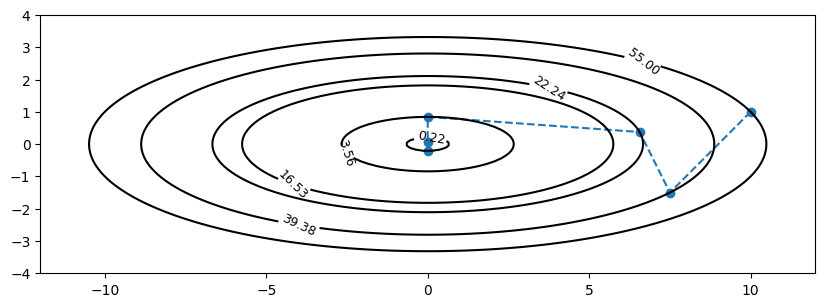

In [22]:
x = np.linspace(-12, 12,100)
y = np.linspace(-4, 4,100)
y = y.reshape(-1, 1)
X, Y = np.meshgrid(x, y)
z = fun([x,y])

fig, ax = plt.subplots(figsize=(10,10))
#ax.plot(10,1,'C00',marker='o')
#ax.plot( 7.5, -1.5,'C01',marker='o')
#ax.plot(6.5625, 0.375,'C02',marker='o')
#ax.plot(0.   ,   0.84375,'C03',marker='o')
#ax.plot( 0. ,       -0.2109375,'C04',marker='o')
#ax.plot(0.   ,      0.05273438,'C05',marker='o')
ax.plot([10,7.5,6.5625,0. ,0.,0. ]  , [ 1,-1.5,0.375,0.84375,-0.2109375,0.05273438],'C00',linestyle='--', marker='o')
CS = ax.contour(X,Y, z, levels=[0.013904571533203125, 0.22247314453125, 3.5595703125,16.530303955078125, 22.236328125, 39.375, 55],
               colors='k')#,colors=['C05', 'C04', 'C03','C02', 'C01', 'C00'])
ax.clabel(CS, fontsize=9, inline=True)
ax.set_aspect('equal')



In [23]:
from scipy.optimize import line_search
import numpy as np

def objective_function(x):
    return x[0]**2 + x[1]**2

def gradient(x):
    return np.array([2*x[0], 2*x[1]])

x = np.array([1.0, 1.0])  # Initial point
direction = np.array([-1.0, -1.0])  # Search direction

# Perform line search
alpha, _, _, _, _, _ = line_search(objective_function, gradient, x, direction)

print("Step size:", alpha)


Step size: 1.0
